The following code helps you to load and visualize the data (skeleton) in 3D xyz coordinates.
 

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
# plt.style.use('seaborn-poster')

#filename and folder to plot
fname= "walking_1"
folder = "hw2data/train/"

vals = np.load(folder+fname+".npy")
xyz = np.reshape( vals[:,:], (38,3,-1) )


print(xyz.shape)

#define the root joint and scaling of the values
r = 1000
xroot, yroot, zroot = xyz[0,0,0], xyz[0,0,1], xyz[0,0,2]

#define the connections between the joints (skeleton) 
I = np.array(
        [1, 2, 3, 4, 5, 6, 1, 8, 9, 10, 11, 12, 1, 14, 15, 16, 17, 18, 19, 16, 21, 22, 23, 25, 26, 24, 28, 16, 30, 31,
         32, 33, 34, 35, 33, 37]) - 1
J = np.array(
        [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32,
         33, 34, 35, 36, 37, 38]) - 1


(38, 3, 100)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/rohanpandey/Desktop/Everything/AMATH 482/Github/AMATH482/Report 2/anim/1.png'

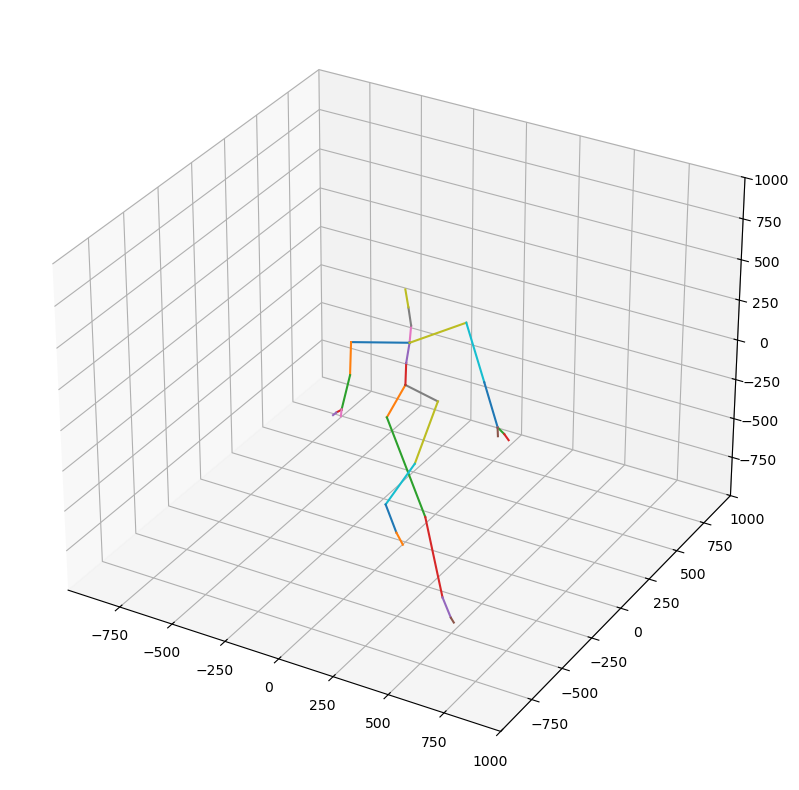

In [2]:
# plot the skeleton accroding to joints (each plot is png image in anim folder)

for tind in range(1,xyz.shape[2]):
    
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    for ijind in range(0,I.shape[0]):
        xline = np.array([xyz[I[ijind],0,tind], xyz[J[ijind],0,tind]])
        yline = np.array([xyz[I[ijind],1,tind], xyz[J[ijind],1,tind]])
        zline = np.array([xyz[I[ijind],2,tind], xyz[J[ijind],2,tind]])
        # use plot if you'd like to plot skeleton with lines
        ax.plot(xline,yline,zline)
    
    # use scatter if you'd like to plot all points without lines 
    # ax.scatter(xyz[:,0,tind],xyz[:,1,tind],xyz[:,2,tind], c = 'r', s = 50)   

    ax.set_xlim([-r+xroot, r+xroot])
    ax.set_zlim([-r+zroot, r+zroot])
    ax.set_ylim([-r+yroot, r+yroot])
    
    plt.savefig('anim/'+f"{tind}.png")
    plt.close()

# when plotting a single sample (the skeleton can simply be plotted without saving an image)
#     plt.draw()
#     plt.pause(.001)
#     plt.show()

 
    
# save the animated plot as a gif in anim folder 
from PIL import Image

images = [Image.open('anim/'+f"{n}.png") for n in range(1,xyz.shape[2])]
images[0].save('anim/'+fname+'.gif', save_all=True, append_images=images[1:], duration=30, loop=0) 

# remove ploted png images
for n in range(1,xyz.shape[2]):
    os.remove('anim/'+f"{n}.png")



